# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [67]:
import numpy as np
import random


def Movimiento_browniano_ejex(posicion, Tiempo, intervalo) :
    Xi = [1, -1]
    dt = np.sqrt(intervalo)
    Wi = [posicion]
    for i in range(round(Tiempo/ intervalo)) :
        Wi.append(Wi[-1] + random.choice(Xi)*dt)
    return Wi

def Movimiento_browniano_ejey(posicion, Tiempo, intervalo) :
    Xi = [1, -1]
    dt = np.sqrt(intervalo)
    Wi = [posicion]
    for i in range(round(Tiempo/intervalo)) :
        Wi.append(Wi[-1] + random.choice(Xi)*dt)
    return Wi

def Movimiento_browniano_ejez(posicion, Tiempo, intervalo) :
    Xi = [1, -1]
    dt = np.sqrt(intervalo)
    Wi = [posicion]
    for i in range(round(Tiempo/intervalo)) :
        Wi.append(Wi[-1] + random.choice(Xi)*dt)
    return Wi

x = Movimiento_browniano_ejex(0, 10, 0.001)
y = Movimiento_browniano_ejey(0, 10, 0.001)
z = Movimiento_browniano_ejez(0, 10, 0.001)


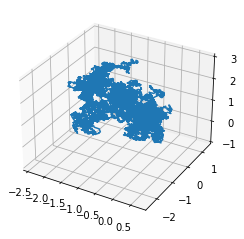

In [69]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

grafica3D = plt.figure()
ejes = grafica3D.add_subplot(111, projection='3d')

ejex = np.array([x])
ejey = np.array([y])
ejez = np.array([z])

ejes.plot_wireframe(ejex, ejey, ejez)

plt.show()

---

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

**Primero definimos una función para realizar la apuesta**

*Primero intente utilizar un ciclo for, pero tenía problemas con la variable iterativa, ya que me marcanba un error de que for i in range no era iterable, así que pasé a un ciclo while.*

In [49]:
import random
moneda = [-1, 1]

def apuesta() :
    ci = 20 
    R = [ci]
    while R[-1]>0 :
        volado = random.choice(moneda)
        c = R[-1]
        if c <= 0 :
            break # El break lo puse para el ciclo for, pero como sigue funcionando la función con el ciclo while dejé el break
        elif (volado == -1) and (c >= 6) :
            c = c - (c/2)
            R.append(c)
        elif (volado == 1) and (ci >= 6) :
            c = c + (c/2)
            R.append(c)
        elif (volado == -1) and (c < 6) :
            R.append(c - 2)
        elif (volado == 1) and (c < 6) :
            R.append(c + 2)
    return R


## 1) Para la evolución del capital hasta quedar en cero

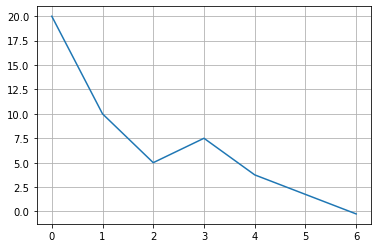

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

y = apuesta()
x = np.arange(0, len(y))

plt.figure()
plt.plot(x, y)
plt.grid()

Vemos que según este caso, tomó **6 volados** para que el apostador perdiera todo el capital

## 2) Promedio de volados para quedar en quiebra

In [53]:
def Apostador (n) :
    M = []
    for i in range(n) :
        M.append(len(apuesta())-1)
    return M
Promedio = round(np.mean(Apostador(10000)))
Promedio 

23

Tenemos que el promedio de volados para quedar en quiebra, simulando para 10,000 apostadores es de **23 volados**

## 3) Histograma

(array([6.226e+03, 2.288e+03, 8.570e+02, 3.690e+02, 1.410e+02, 6.900e+01,
        2.800e+01, 1.500e+01, 3.000e+00, 4.000e+00]),
 array([  5. ,  21.3,  37.6,  53.9,  70.2,  86.5, 102.8, 119.1, 135.4,
        151.7, 168. ]),
 <BarContainer object of 10 artists>)

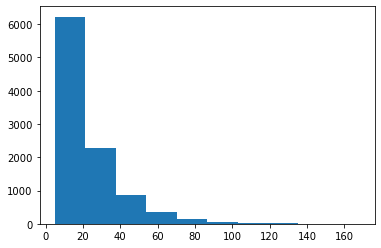

In [59]:
P = np.array(Apostador(10000))

plt.figure()
plt.hist(P)

---